In [ ]:
!pip install -q keras-ocr

     |████████████████████████████████| 42 kB 904 kB/s 
     |████████████████████████████████| 965 kB 9.7 MB/s 
     |████████████████████████████████| 619 kB 61.0 MB/s 
     |████████████████████████████████| 9.5 MB 53.8 MB/s 
     |████████████████████████████████| 50 kB 7.0 MB/s 


In [ ]:
import keras_ocr
import matplotlib.pyplot as plt
import numpy as np 
import math
import cv2

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
images = [
    keras_ocr.tools.read(img) for img in ["/content/drive/MyDrive/sample/all barcode/IMG_20220303_173611.jpg" , '/content/drive/MyDrive/sample/all barcode/IMG_20220303_173846.jpg']
]

In [ ]:
len(images)

2

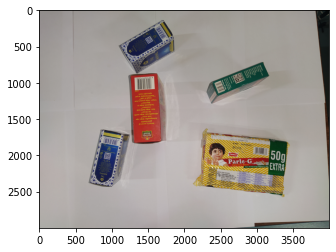

In [ ]:
#plt.figure(figsize = (10,20))
plt.imshow(images[0])

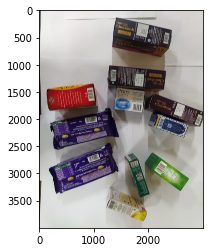

In [ ]:
#plt.figure(figsize = (10,20))
plt.imshow(images[1])

In [ ]:
prediction_groups = pipeline.recognize(images)

14/14 [==============================] - 110s 8s/step


In [ ]:
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

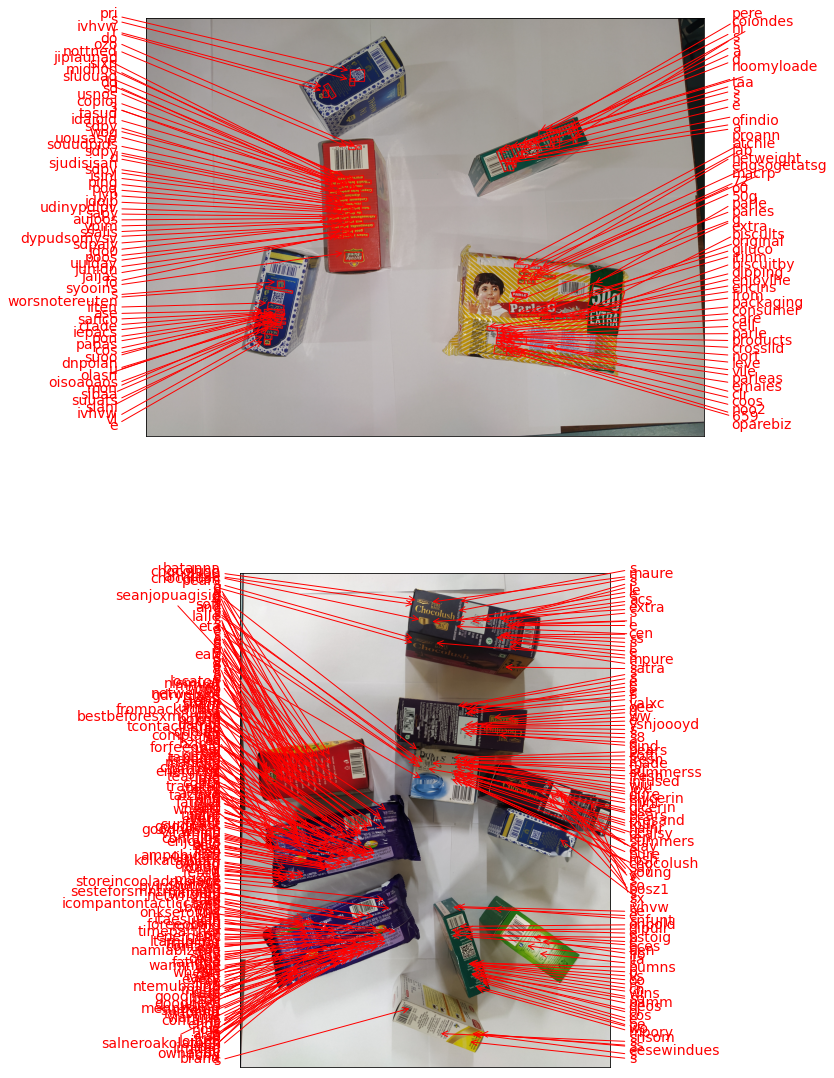

In [ ]:
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, 
                                    predictions=predictions, 
                                    ax=ax)
    mask = np.zeros(image.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1] 
        x2, y2 = box[1][2]
        x3, y3 = box[1][3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        image = cv2.inpaint(image, mask, 7, cv2.INPAINT_NS)
        plt.imshow(image)
    

In [ ]:
print(prediction_groups)

In [ ]:
print(len(prediction_groups))

1


In [ ]:
print(len(prediction_groups))

1


In [ ]:
print(prediction_groups[0][1])

('s', array([[1460.9375 ,  441.40625],
       [1496.0938 ,  441.40625],
       [1496.0938 ,  492.1875 ],
       [1460.9375 ,  492.1875 ]], dtype=float32))


In [ ]:
import cv2

In [ ]:
print(prediction_groups[0][2])

('ivhvw', array([[1272.9108 ,  494.46985],
       [1305.214  ,  474.2802 ],
       [1363.1495 ,  566.9768 ],
       [1330.8462 ,  587.16644]], dtype=float32))


In [ ]:
print(prediction_groups[0][2][1][0])

[1272.9108   494.46985]


In [ ]:
i = 0
j = 0
k = 0
l = 0

In [ ]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np
from google.colab.patches import cv2_imshow

In [1]:
drawn = keras_ocr.tools.drawBoxes(
image=image, boxes=predictions, color = (0,0,0), thickness= 5,boxes_format='predictions')
  #plt.figure(figsize = (20,20))
plt.imshow(drawn)

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
j = cv2.cvtColor(drawn, cv2.COLOR_RGB2BGR)
cv2.imwrite("/content/drive/MyDrive/sample/output_IMG_20220303_175317.jpg",j)

True